<a href="https://colab.research.google.com/github/tsnow2010/umbc_data690_fall2024/blob/main/Assignments/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 05

In [ ]:
import pandas as pd
import plotly.express as px

pd.set_option("display.max_rows", None)

df = pd.read_csv("https://raw.githubusercontent.com/wcj365/python-stats-dataviz/refs/heads/master/fall2024/data/World_Development_Indicators_(WDI).csv")

df.shape

(4123, 9)

In [ ]:
df.sample(5)

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
1713,2007,Indonesia,1840.329927,68.18900,234858289.0,IDN,East Asia & Pacific,Upper middle income,IBRD
2005,2014,Kosovo,3902.530841,78.88000,1812771.0,XKX,Europe & Central Asia,Upper middle income,IDA
2525,2021,Montenegro,9465.961530,73.82439,619211.0,MNE,Europe & Central Asia,Upper middle income,IBRD
2581,2020,Myanmar,1479.613689,66.79700,53423198.0,MMR,East Asia & Pacific,Lower middle income,IDA
2868,2022,Palau,NaN,NaN,18055.0,PLW,East Asia & Pacific,Upper middle income,IBRD


In [ ]:
df.isna().sum()

Year                                         0
Country                                      0
GDP per capita (current US$)               161
Life expectancy at birth, total (years)    346
Population, total                            0
Country Code                                 0
Region                                       0
Income Group                                 0
Lending Type                                 0
dtype: int64

In [ ]:
df[["Year", "Country","GDP per capita (current US$)", "Life expectancy at birth, total (years)"]].sample(5)

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)"
2120,2015,Lesotho,1113.836835,51.101
1918,2022,Kazakhstan,11492.031939,NaN
1148,2012,Equatorial Guinea,18756.425027,58.865
2283,2007,Malaysia,7144.000240,74.211
1121,2004,El Salvador,2273.955503,70.340


In [ ]:
df2 = df[df["Year"] != 2022]
df2.shape

(3906, 9)

In [ ]:
df2.isna().sum()

Year                                         0
Country                                      0
GDP per capita (current US$)               140
Life expectancy at birth, total (years)    129
Population, total                            0
Country Code                                 0
Region                                       0
Income Group                                 0
Lending Type                                 0
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isna().sum()

Year                                       0
Country                                    0
GDP per capita (current US$)               0
Life expectancy at birth, total (years)    0
Population, total                          0
Country Code                               0
Region                                     0
Income Group                               0
Lending Type                               0
dtype: int64

In [ ]:
df3.shape

(3641, 9)

## Homework Question 1:

to check if this dataset has duplicate rows. If it has, only keep one from the duplicated rows and drop the rest.

In [ ]:
# Below makes a DataFrame of duplicate rows from 'df.'
# However, there doesn't appear to be any duplicate rows.
df3[df3.duplicated()]

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type


In [ ]:
# Another way to do this.
print(df3.duplicated().sum())

0


## HW Question 2

Find out if there is a relationship between wealth and health

Pick any year worth of data and use plotly express to generate a scatter plot with GDP as x and life expectancy as y.

In [ ]:
# Picked year 2021.
year_picked = 2021
df4 = df3[df3['Year'] == 2021]
# Check for NaN values // (0) in all categories.
df4.isna().sum()

Year                                       0
Country                                    0
GDP per capita (current US$)               0
Life expectancy at birth, total (years)    0
Population, total                          0
Country Code                               0
Region                                     0
Income Group                               0
Lending Type                               0
dtype: int64

In [ ]:
df4 = df4.dropna(subset=['Year'])

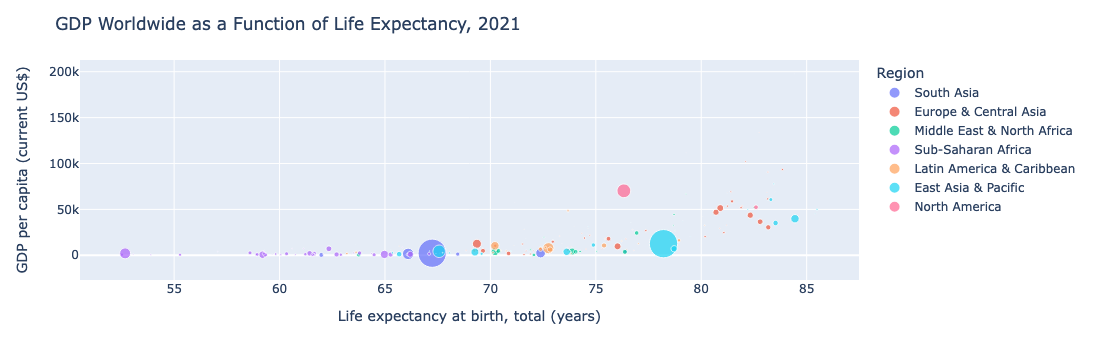

In [ ]:
# Make scatter plot with total years as a function of life expectancy.  Also, the country name is added to hover_data for reference.
fig1 = px.scatter(df4,x='Life expectancy at birth, total (years)',y='GDP per capita (current US$)',hover_data='Country', color='Region', size="Population, total")
fig1.update_layout(title_text=f' GDP Worldwide as a Function of Life Expectancy, {year_picked}')
fig1.show()

## Compare China, US, India, Russia

/var/folders/yx/32mlh_nx5ns6v1zmf7rs6l8h0000gn/T/ipykernel_1472/1902289315.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



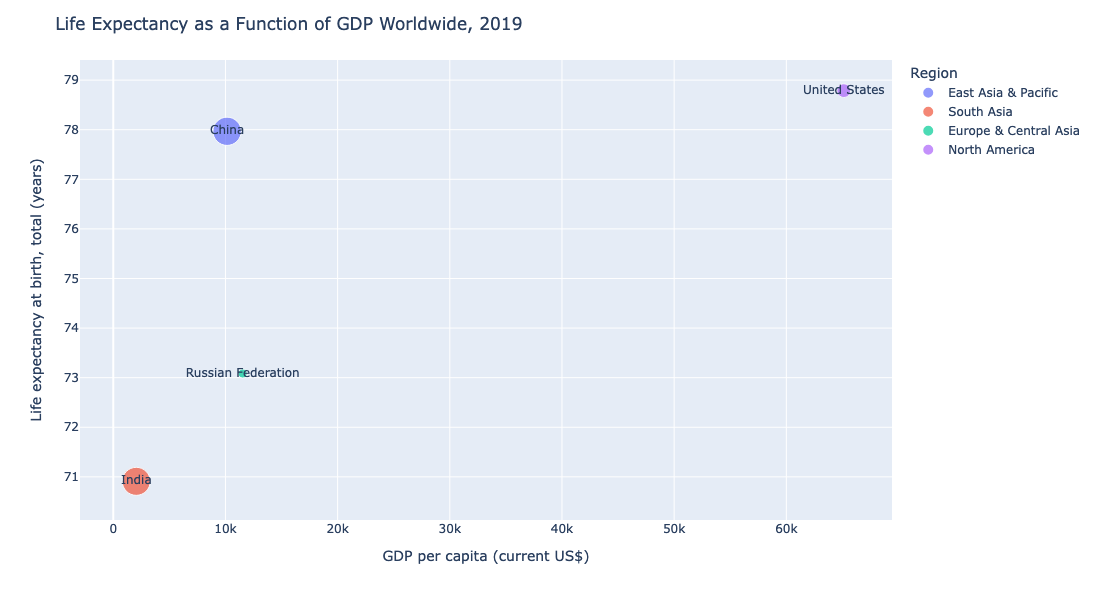

In [ ]:
year_picked = 2019
df_4_countries = df3[df['Year'] == year_picked]
df_4_countries = df_4_countries[df_4_countries['Country Code'].isin(['USA',"IND", "CHN", "RUS"])]
df_4_countries.reset_index()
fig_4_countries = px.scatter(df_4_countries,x='GDP per capita (current US$)',y='Life expectancy at birth, total (years)',hover_data='Country', color='Region', size="Population, total", text='Country', width=1000,height=600)
fig_4_countries.update_layout(title_text=f' Life Expectancy as a Function of GDP Worldwide, {year_picked}')
fig_4_countries.show()

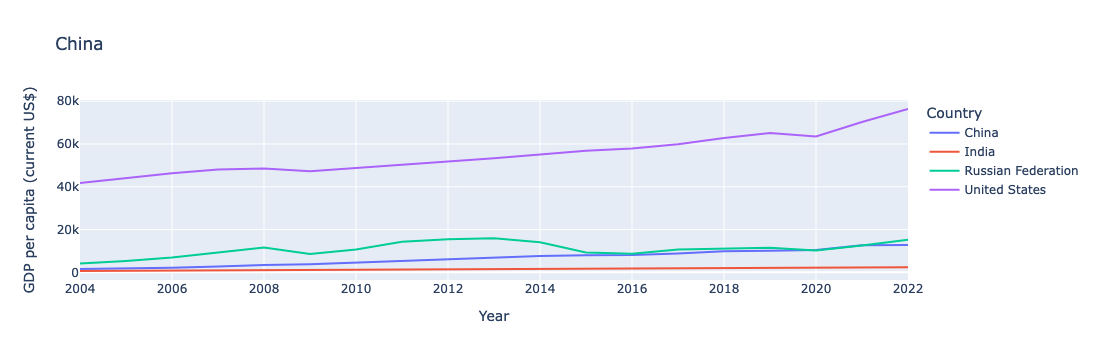

In [ ]:
# Now let's compare income:
df_income = df[df['Country Code'].isin(['USA',"IND", "CHN", "RUS"])]
fig_line = px.line(
    df_income,
    x='Year',
    y="GDP per capita (current US$)",
    title='China',
    hover_data = 'Country',
    color = 'Country'
)
fig_line.show()

### Observation: The outliers and clumped points to the left of the graph are making the graph hard to view critically.

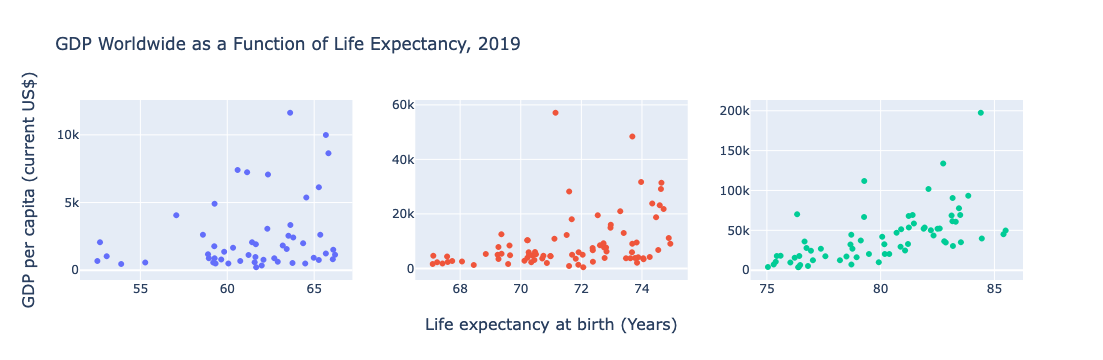

In [ ]:
# What if we made three separate scatterplots, dividing them by life expectancy 75 Y/O?

# import packages for subplot functionality
import plotly.subplots as sp
import plotly.graph_objects as go

# Step 1: Make (3) DataFrames from df4 separating data by life expectancy at below 67, between 67 and 75, and over 75 Y/O.
df4_1 = df4[df4['Life expectancy at birth, total (years)'] <= 67]
df4_2 = df4[(df4['Life expectancy at birth, total (years)'] > 67) & (df4['Life expectancy at birth, total (years)'] <= 75)]
df4_3 = df4[df4['Life expectancy at birth, total (years)'] > 75]

# Step 2: Make object with (3) subplots, all in (1) row.
fig1_2 = sp.make_subplots(rows=1,cols=3, x_title='Life expectancy at birth (Years)', y_title='GDP per capita (current US$)')
#fig1_2.update_xaxes(title_text='Life expectancy at birth (Years)', row=1, col=1) ## Use these when you have subplots with different data.
#fig1_2.update_yaxes(title_text='GDP per capita (current US$)', row=1, col=1)
fig1_2.add_trace(
    go.Scatter(
        x=df4_1['Life expectancy at birth, total (years)'],
        y=df4_1['GDP per capita (current US$)'],
        mode='markers',hoverinfo='x+y+text',
        text=df4_1['Country'],
        hovertemplate='Life Expectancy at birth (Years): %{x}<br>GDP per capita (current US$): %{y}<br>Country: %{text}'),
    row=1,col=1)
fig1_2.add_trace(
    go.Scatter(
        x=df4_2['Life expectancy at birth, total (years)'],
        y=df4_2['GDP per capita (current US$)'],
        mode='markers',hoverinfo='x+y+text',
        text=df4_2['Country'],
        hovertemplate='Life Expectancy at birth (Years): %{x}<br>GDP per capita (current US$): %{y}<br>Country: %{text}'),
    row=1,col=2)
fig1_2.add_trace(
    go.Scatter(
        x=df4_3['Life expectancy at birth, total (years)'],
        y=df4_3['GDP per capita (current US$)'],
        mode='markers',hoverinfo='x+y+text',
        text=df4_3['Country'],
        hovertemplate='Life Expectancy at birth (Years): %{x}<br>GDP per capita (current US$): %{y}<br>Country: %{text}'),
    row=1,col=3)
# Remove legend
fig1_2.update_layout(showlegend=False,title_text=f' GDP Worldwide as a Function of Life Expectancy, {year_picked}')
# Step 3: Show the subplots.
fig1_2.show()

### Conclusion:
> * Now that the initial scatter plot was divided into (3) parts, we can look at the entire graph more critically without removing outliers.  Since I believe these outliers convey important information in this case, I thought it unwise to remove them.
> * While there appears to be a positive correlation between GDP and Life Expectancy, there appears to be other significant factors as well.  For instance, in the first two graphs, there are many countries with relatively high GDPs but relatively low life expectancies.  On the other hand, the positive correlation appears strongest in the third graph.

## Homework Question 3

Select a year of data. calculate total population of each region and make a pie chart to display the distribution of total population of all regions.

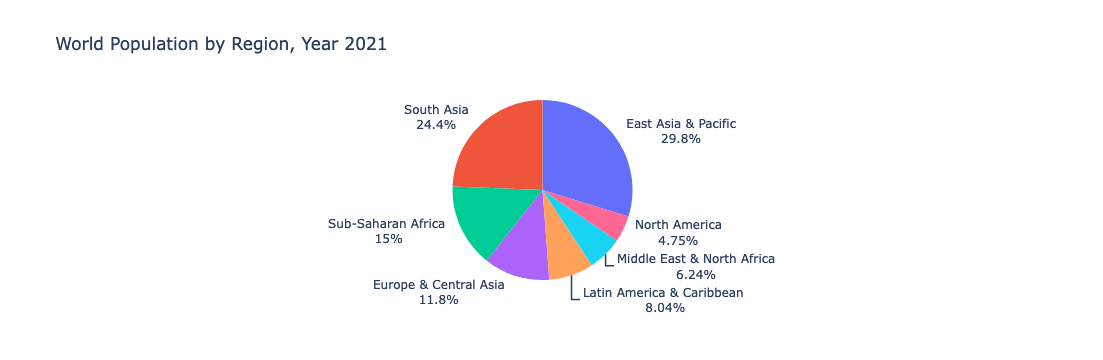

In [ ]:
# Use the DataFrame used above and make a pie chart of total population per region as of year 2021.
df_pop_reg_2021 = df4.groupby("Region")["Population, total"].sum()
fig2 = px.pie(df_pop_reg_2021.reset_index(),names='Region',values='Population, total',title='World Population by Region, Year 2021')
fig2.update_traces(textinfo='percent+label',textposition='outside')
fig2.update_layout(showlegend=False)
fig2.show()

## Exercise

Calculate average GDP per capita for  each region and make a bar chart.

In [ ]:
df_2020 = df3[df3["Year"] == 2020]
df_2020.shape

(202, 9)

In [ ]:
df_2020.sample(5)

,Year,Country,GDP per capita (current US$),"Life expectancy at birth, total (years)","Population, total",Country Code,Region,Income Group,Lending Type
4120,2020,Zimbabwe,1372.696674,61.124000,15669666.0,ZWE,Sub-Saharan Africa,Lower middle income,Blend
1270,2020,Fiji,4815.689148,67.924000,920422.0,FJI,East Asia & Pacific,Upper middle income,Blend
1650,2020,"Hong Kong SAR, China",46109.229995,85.497561,7481000.0,HKG,East Asia & Pacific,High income,Not classified
3702,2020,Togo,886.699512,61.035000,8442580.0,TGO,Sub-Saharan Africa,Low income,IDA
1517,2020,Guam,34780.861662,76.612000,169231.0,GUM,East Asia & Pacific,High income,Not classified


In [ ]:
df_group = df.groupby("Region")["GDP per capita (current US$)"].mean()
df_group

Region
East Asia & Pacific           15178.578702
Europe & Central Asia         32834.037083
Latin America & Caribbean     13226.709551
Middle East & North Africa    15653.223444
North America                 67679.379373
South Asia                     2357.171555
Sub-Saharan Africa             2271.143792
Name: GDP per capita (current US$), dtype: float64

In [ ]:
df_group = df_group.reset_index()
df_group

,Region,GDP per capita (current US$)
0,East Asia & Pacific,15178.578702
1,Europe & Central Asia,32834.037083
2,Latin America & Caribbean,13226.709551
3,Middle East & North Africa,15653.223444
4,North America,67679.379373
5,South Asia,2357.171555
6,Sub-Saharan Africa,2271.143792


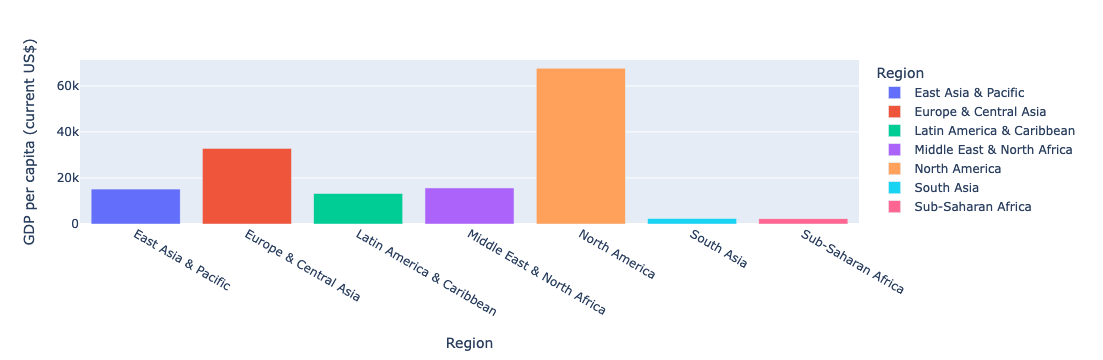

In [ ]:
fig = px.bar(df_group, x="Region", y="GDP per capita (current US$)", color="Region")

fig.show()

## Home work question 4

1. remove the color legend.
2. Order the above bar chart based on the values of the average GDP per capita.

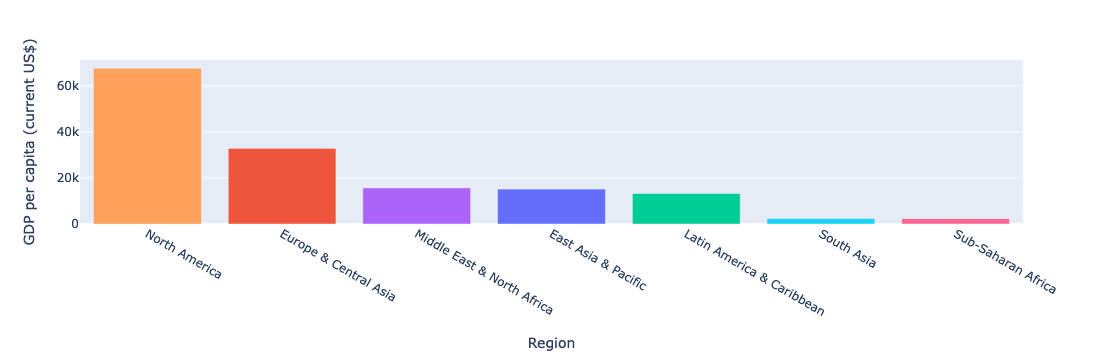

In [ ]:
# 1)
fig.update_layout(showlegend=False)
# 2)
fig.update_layout(xaxis={'categoryorder':'total descending'})

## Homework #5

- Pick a few countries of your interest (for example, G7, BRICS, Nordic countries).
1. Create a line chart showing the trend of Life Expectancy over time for comparing those countries.
2. Pick a year from the data of the above few countries and create a scatter plot to compare their GDP per capita and life expectancy. The size of the dots represent the population. This type of scatter plot is called bubble chart.
3. Bonus - compute the average GDP per capita, the average life expectancy, and the total population for each year of all the seven regions (aggregation) and repeat 1 and 2 using the aggregated data for all regions



In [ ]:
### 1) Life Expectancy over time comparing Nordic countries:

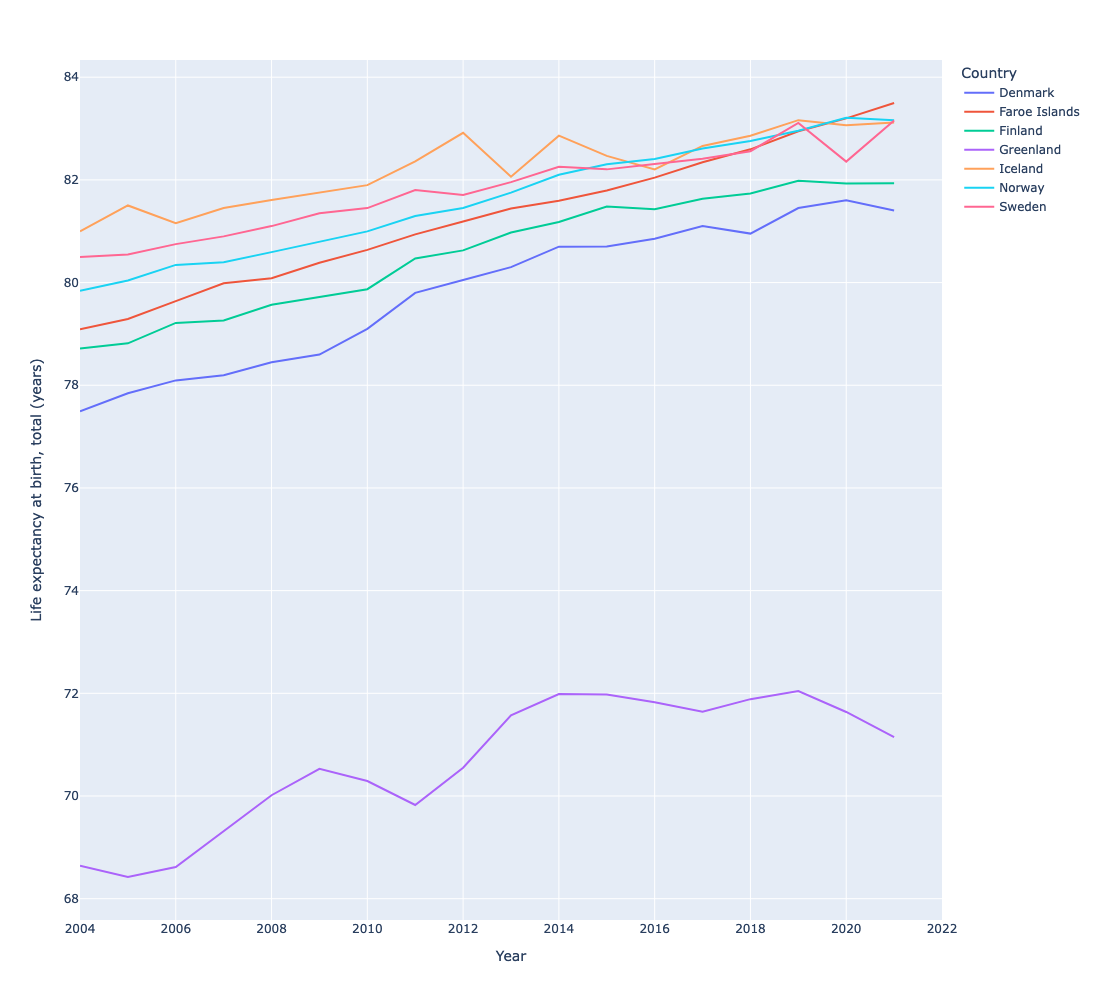

In [ ]:
# List of nordic countries
nordic_countries = ['Denmark', 'Norway', 'Sweden', 'Finland',  'Iceland', 'Greenland', 'Faroe Islands'] # Check Aland and Faroe Islands

# Selecting data of nordic countries
df_nordic = df[df["Country"].isin(nordic_countries)]

# Make and display line graph comparing nordic countries and their life expectancy as a function of time
fig_nordic_life_as_time = px.line(
    df_nordic,
    x = 'Year',
    y = 'Life expectancy at birth, total (years)',
    color = 'Country',
    height = 1000
)
fig_nordic_life_as_time.show()

### 2) From 2021, create a scatter plot (bubble chart):
> * To compare their GDP per capita and life expectancy.
>   * The size of the dots represent the population.

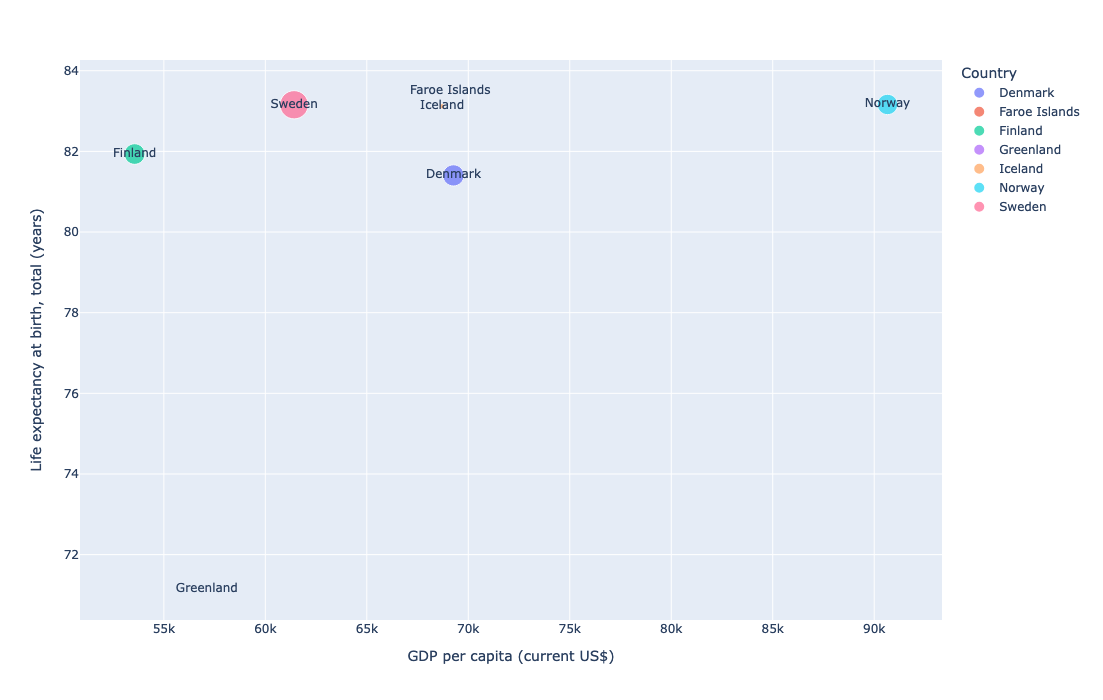

In [ ]:
# Selecting data comparing nordic countries and their life expectancy as a function of GDP in 2021
df_nordic_2021 = df_nordic[df_nordic['Year'] == 2021]

# Make and display bubble chart, with size indicating relative population numbers
fig_nordic_life_asfunct_GDP = px.scatter(
    df_nordic_2021,
    x='GDP per capita (current US$)',
    y='Life expectancy at birth, total (years)',
    size='Population, total',
    color='Country',
    text='Country',
    height=700
)
fig_nordic_GDP_asfunct_life.show()

### 3) Bonus
> * Compute the average GDP per capita, the average life expectancy, and the total population for each year of all the seven regions (aggregation)
> * Repeat 1 and 2 using the aggregated data for all regions

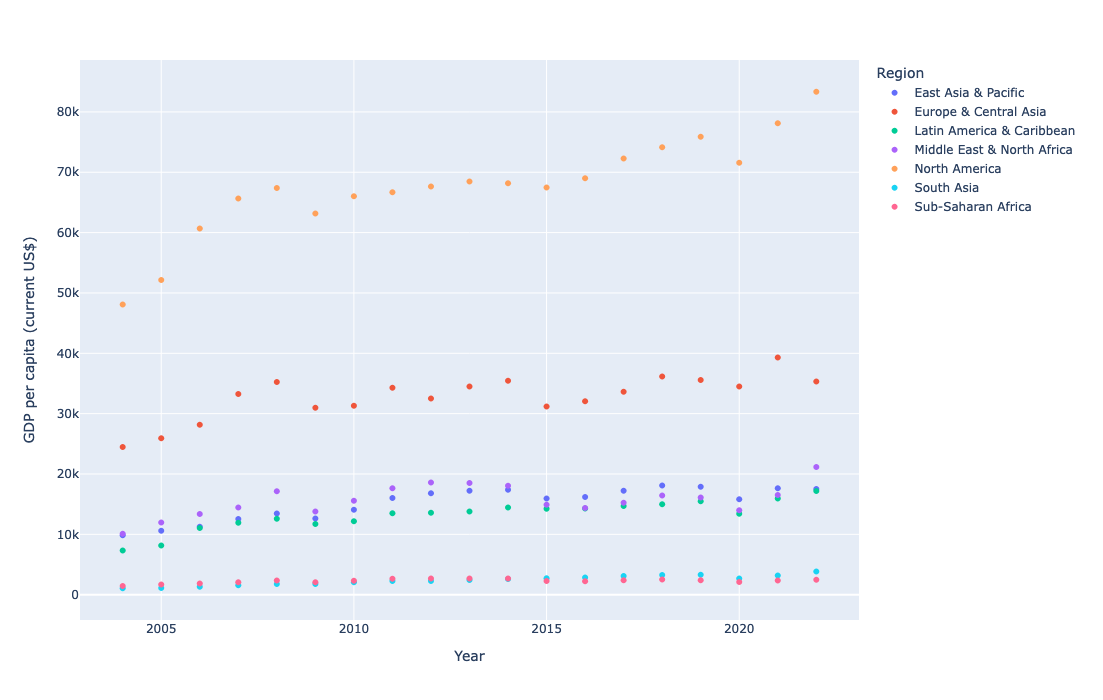

In [ ]:
# Aggregation of region and year and taking average of GDP
df_region_year_avg_GDP_mean = df.groupby(["Year", "Region"])["GDP per capita (current US$)"].mean()

# Make and display scatter plot
fig_region_year_avg_GDP_mean = px.scatter(
    df_region_year_avg_GDP_mean.reset_index(),
    x='Year',
    y='GDP per capita (current US$)',
    color='Region',
    height=700
)
fig_region_year_avg_GDP_mean.show()



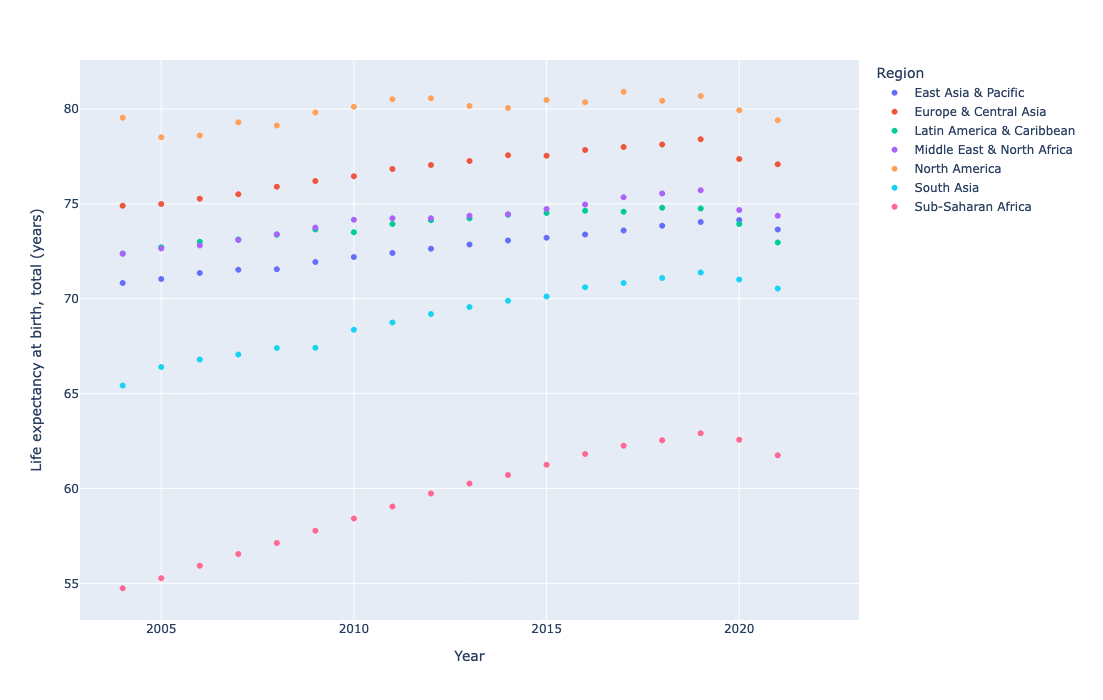

In [ ]:
# Aggregation of region and year and taking average of life expectancy
df_region_year_life_mean = df.groupby(["Year", "Region"])["Life expectancy at birth, total (years)"].mean()

# Make and display scatter plot
fig_region_year_life_mean = px.scatter(
    df_region_year_life_mean.reset_index(),
    x='Year',
    y='Life expectancy at birth, total (years)',
    color='Region',
    height=700
)
fig_region_year_life_mean.show()

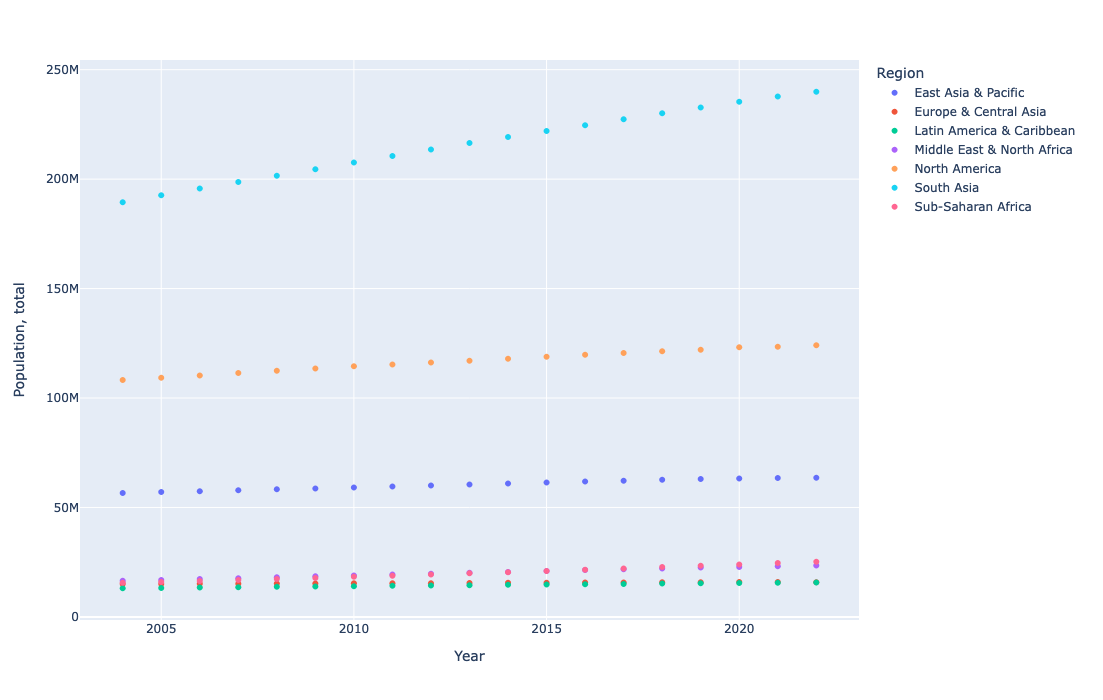

In [ ]:
# Aggregation of region and year and taking average of population
df_region_year_pop_mean = df.groupby(["Year", "Region"])["Population, total"].mean()

# Make and display scatter plot
fig_region_year_pop_mean = px.scatter(
    df_region_year_pop_mean.reset_index(),
    x='Year',
    y='Population, total',
    color='Region',
    height=700
)
fig_region_year_pop_mean.show()

In [ ]:
# Extra Notes:
# See below for how to aggregate totals by year and region

df_group = df.groupby(["Year", "Region"])["Population, total"].mean()
print(df_group.reset_index())


     Year                      Region  Population, total
0    2004         East Asia & Pacific       5.659490e+07
1    2004       Europe & Central Asia       1.500467e+07
2    2004  Latin America & Caribbean        1.309280e+07
3    2004  Middle East & North Africa       1.652595e+07
4    2004               North America       1.082699e+08
5    2004                  South Asia       1.894629e+08
6    2004         Sub-Saharan Africa        1.555306e+07
7    2005         East Asia & Pacific       5.702149e+07
8    2005       Europe & Central Asia       1.505024e+07
9    2005  Latin America & Caribbean        1.325570e+07
10   2005  Middle East & North Africa       1.687916e+07
11   2005               North America       1.092748e+08
12   2005                  South Asia       1.926580e+08
13   2005         Sub-Saharan Africa        1.597872e+07
14   2006         East Asia & Pacific       5.744841e+07
15   2006       Europe & Central Asia       1.509703e+07
16   2006  Latin America & Cari